In [2]:
from google.colab import files
#upload both train.csv and test.csv
uploaded=files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Load train and test data
train=pd.read_csv('train.csv',index_col='Id')
test=pd.read_csv('test.csv',index_col='Id')

In [5]:
print("size of training dataset is",train.shape)
print("size of testing dataset is",test.shape)

size of training dataset is (1460, 80)
size of testing dataset is (1459, 79)


In [6]:
train.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
test.head(5)
print(train.isnull().sum())
test.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64


MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 79, dtype: int64

In [8]:
#getting description of 'SalesPrice' for better understanding
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


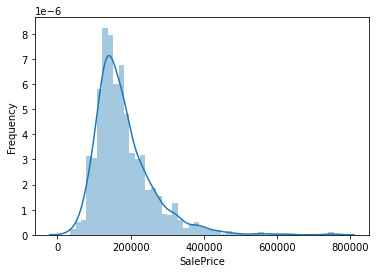

In [9]:
#DATA VISUALISATION
sns.distplot(train['SalePrice']) #plot histogram
plt.ylabel('Frequency')
plt.show()

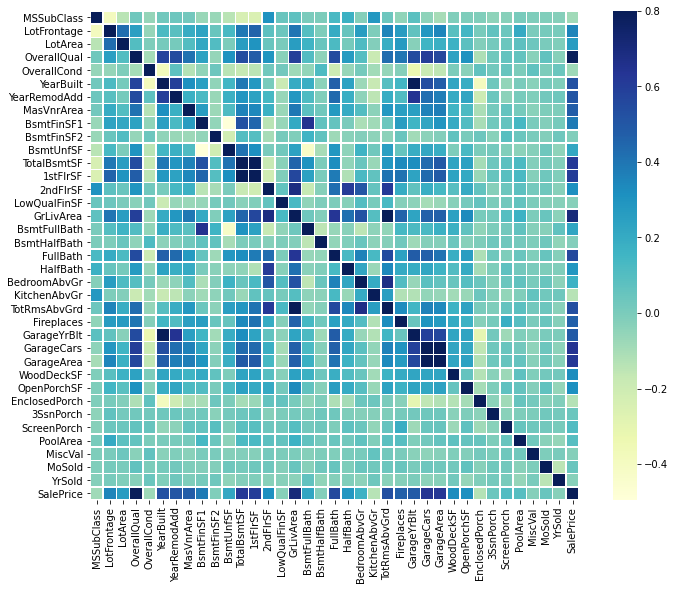

In [10]:
#Plotting correlation
correlation_matrix=train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(correlation_matrix, square=True ,vmax=.8,linewidths=.5,cmap="YlGnBu",)
plt.show()

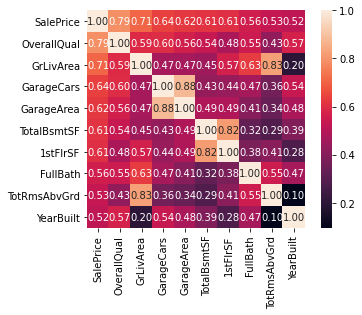

In [11]:
# Top 10 Heatmap
k = 10 #number of variables for heatmap
cols = correlation_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

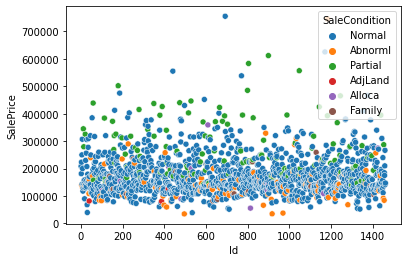

In [12]:
sns.scatterplot(x=train.index, y=train.SalePrice,hue=train.SaleCondition )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


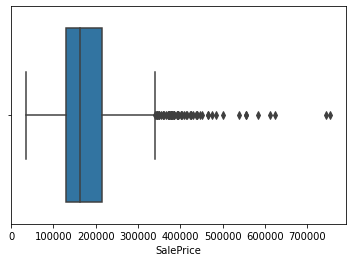

inter_quartile= 84025.0


In [13]:
sns.boxplot(train['SalePrice'])
plt.show()
from scipy.stats import iqr
q1=train['SalePrice'].quantile(0.25)
q2=train['SalePrice'].quantile(0.75)
print('inter_quartile=',(q2-q1))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


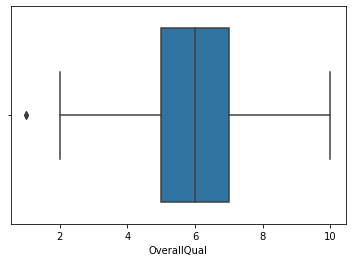

inter_quartile= 2.0


In [14]:
sns.boxplot(train['OverallQual'])
plt.show()
from scipy.stats import iqr
q1=train['OverallQual'].quantile(0.25)
q2=train['OverallQual'].quantile(0.75)
print('inter_quartile=',(q2-q1))

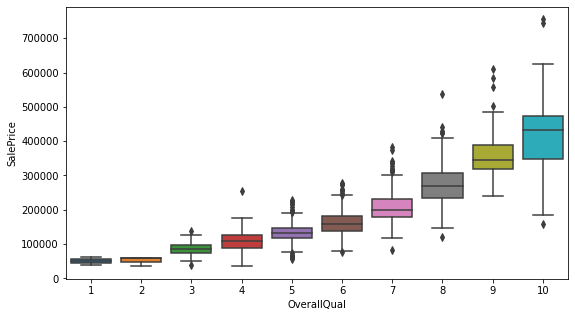

In [15]:
f,ax= plt.subplots(figsize=(9,5))
ax = sns.boxplot(x="OverallQual", y="SalePrice", data=train)

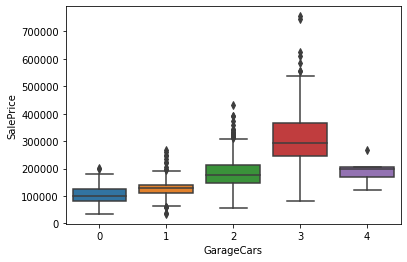

In [16]:
# Garage Area vs Sale Price
sns.boxplot(x=train['GarageCars'], y=train['SalePrice'])

In [17]:
# Removing outliers manually (More than 4-cars, less than $300k)
train = train.drop(train[(train['GarageCars']>3) 
                         & (train['SalePrice']<300000)].index).reset_index(drop=True)

In [18]:
#Combing Datasets
ntrain = train.shape[0]  #gives number of rows in training dataset
print(ntrain)
ntest = test.shape[0]
print(ntest)
df=pd.concat((train,test)).reset_index(drop=True)
df=df.drop(columns='SalePrice')
df.shape

1455
1459


(2914, 79)

In [19]:
for i in df.columns:
  if (df[i].isnull().sum()):
    print(i,df[i].isnull().sum(),df[i].dtype)

MSZoning 4 object
LotFrontage 485 float64
Alley 2717 object
Utilities 2 object
Exterior1st 1 object
Exterior2nd 1 object
MasVnrType 24 object
MasVnrArea 23 float64
BsmtQual 81 object
BsmtCond 82 object
BsmtExposure 82 object
BsmtFinType1 79 object
BsmtFinSF1 1 float64
BsmtFinType2 80 object
BsmtFinSF2 1 float64
BsmtUnfSF 1 float64
TotalBsmtSF 1 float64
Electrical 1 object
BsmtFullBath 2 float64
BsmtHalfBath 2 float64
KitchenQual 1 object
Functional 2 object
FireplaceQu 1417 object
GarageType 157 object
GarageYrBlt 159 float64
GarageFinish 159 object
GarageCars 1 float64
GarageArea 1 float64
GarageQual 159 object
GarageCond 159 object
PoolQC 2904 object
Fence 2344 object
MiscFeature 2809 object
SaleType 1 object


In [20]:
df["PoolQC"] = df["PoolQC"].fillna("None")
df["MiscFeature"] = df["MiscFeature"].fillna("None")
df["Alley"] = df["Alley"].fillna("None")
df["Fence"] = df["Fence"].fillna("None")
df["FireplaceQu"] = df["FireplaceQu"].fillna("None")
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df[col] = df[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df[col] = df[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df[col] = df[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df[col] = df[col].fillna('None')
df["MasVnrType"] = df["MasVnrType"].fillna("None")
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)
df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])
dff = df.drop(['Utilities'], axis=1)
df["Functional"] = df["Functional"].fillna("Typ")
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])
df['MSSubClass'] = df['MSSubClass'].fillna("None")

In [21]:
#FEATURE ENGINEERING
df.describe()
#checking categorical variable
column_list=[]
for col in df.columns:
  if df[col].dtype=='O':
    column_list.append(col)
len(column_list)
column_list

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [22]:
#Convert categorical features to one hot encoding
print(df.shape)
final_df=pd.get_dummies(df, column_list)
print(final_df.shape)
X_train=final_df[:ntrain]
y_train=train['SalePrice']


(2914, 79)
(2914, 302)


In [23]:
"""from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=2, random_state=0)
y_train_pred=regr.fit(X_train,y_train)
print(regr.score(X_train,y_train))
x_test=final_df[ntrain:]
y_test=regr.predict(x_test)
y_test
"""


'from sklearn.ensemble import RandomForestRegressor\n\nregr = RandomForestRegressor(max_depth=2, random_state=0)\ny_train_pred=regr.fit(X_train,y_train)\nprint(regr.score(X_train,y_train))\nx_test=final_df[ntrain:]\ny_test=regr.predict(x_test)\ny_test\n'

In [24]:
import xgboost
model = xgboost.XGBRegressor()
model.fit(X_train,y_train)
print(model.score(X_train,y_train))
x_test=final_df[ntrain:]
y_test=model.predict(x_test)
print(y_test)

[05:49:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9631015569379434
[120668.39 166957.83 177042.89 ... 156788.7  117692.66 238116.16]


In [27]:
#To prediction
y_train_pred=model.predict(X_train)#predict regression value for X_test
#Formula for calculating RMSE
from sklearn.metrics import r2_score,mean_squared_error
mse=mean_squared_error(y_train, y_train_pred)
print(mse)
rmse=np.sqrt(mse)
rmse

233211961.73900494


15271.278981768519

In [ ]:
sub=pd.DataFrame({'Id':test.index,'SalePrice':y_test})
sub.tail(5)

In [ ]:
from google.colab import files
#upload both train.csv and test.csv
uploaded=files.upload()


In [ ]:
output_pred = pd.DataFrame(y_test)
sub = pd.read_csv('sample_submission.csv')
dataset = pd.concat([sub['Id'],output_pred],axis=1)
dataset.columns=['Id','SalePrice']
dataset.to_csv('sample_submission.csv',index=False)